# Running inference of Busche data
* completely remove inference definition from here and refer to according class
* clean up and redo plots!

In [1]:
%load_ext autoreload
%autoreload 2
import warnings

warnings.filterwarnings("ignore")

import os, sys
from pathlib import Path

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path:
    sys.path.insert(0, str(root_dir))

In [2]:
import numpy as np

# import pandas as pd
# import quadpy
# from dynesty import NestedSampler, DynamicNestedSampler, utils, plotting
# import ultranest
# from ultranest.plot import cornerplot

# import matplotlib.pyplot as plt
# from collections import Counter
# import json
# import pickle

# import scipy as sp
# from scipy.special import binom as sp_binom
# from scipy.special import factorial as sp_factorial

# import time

In [ ]:
# from inference import *
# from DM_theory import *
# from empirical.readData import *
# from empirical.model import *

In [3]:
from inference.BayesModel import *
from empirical.readData import ModelParams

INFO:numexpr.utils:NumExpr defaulting to 12 threads.


In [4]:
mP = ModelParams(mode="empirical", filePath="../../../data/BuscheLab/2P_data.xlsx")
mP.two_pop = True

['mouse type', 'mouse_ID']


In [9]:
BM = BayesModel(mP, mode="rates")
BM.prepare_data(mP, mode="rates", key="WT")
BM.set_priors(hierarchical=["gamma_0","delta_0","gamma_1","delta_1"], two_pop=True)

In [8]:
BM.priors

{'p': {'idx': 0,
  'n': 1,
  'meta': False,
  'transform': <function inference.HierarchicalModelDefinition.HierarchicalModel.set_prior_param.<locals>.<lambda>(x, params={}, fun=<function BayesModel.set_priors.<locals>.<lambda> at 0x77056eaa5700>)>},
 'gamma_0_mean': {'idx': 1,
  'n': 1,
  'meta': True,
  'transform': <function inference.HierarchicalModelDefinition.HierarchicalModel.set_prior_param.<locals>.<lambda>(x, params={'loc': 2.0, 'scale': 0.5}, fun=<function BayesModel.set_priors.<locals>.<lambda> at 0x77056eaa55e0>)>},
 'gamma_0_sigma': {'idx': 2,
  'n': 1,
  'meta': True,
  'transform': <function inference.HierarchicalModelDefinition.HierarchicalModel.set_prior_param.<locals>.<lambda>(x, params={'loc': 0, 'scale': 0.1}, fun=<function BayesModel.set_priors.<locals>.<lambda> at 0x77056eaa5670>)>},
 'gamma_0': {'idx': 3,
  'n': 4,
  'meta': False,
  'idx_mean': 1,
  'idx_sigma': 2,
  'transform': <function inference.HierarchicalModelDefinition.HierarchicalModel.set_prior_param.<

In [61]:
vectorized = False
my_prior_transform = BM.set_prior_transform(vectorized=vectorized)
my_likelihood = BM.set_logl(
    vectorized=vectorized,
    correct_N=5,
    bias_to_expected_max=0,
    bias_to_mean=0,
    biological=False,
)

p = np.random.rand(BM.nParams)
# print(p)
# print(p_transformed := my_prior_transform(p))
# print(my_likelihood(p_transformed))

In [12]:
BM, res, sampler = run_sampling(
    mP,
    mode="ultranest",
    hierarchical=["gamma_0","delta_0","gamma_1","delta_1"],
    n_live=100,
    correct_N=5,
    bias_to_expected_max=0.0,
    nP=12,
    key="WT",
)

DEBUG:ultranest:ReactiveNestedSampler: dims=26+0, resume=False, log_dir=None, backend=hdf5, vectorized=True, nbootstraps=20, ndraw=512..65536


KeyboardInterrupt: 

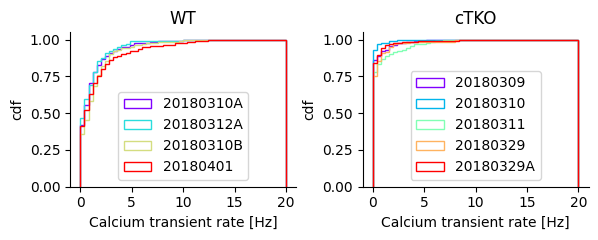

In [ ]:
# mice_types = I.data_df.columns.get_level_values(0).unique()
mice_types = ["WT", "cTKO"]

fig = plt.figure(figsize=(6, 2.5))
for i, mouse_type in enumerate(mice_types):
    # if i % 2 == 0:
    #     ax = fig.add_subplot(2, 2, i // 2 + 1)
    #     ls = "-"
    # else:
    #     ls = "--"
    ls = "-"
    ax = fig.add_subplot(1, 2, i + 1)

    # print(I.data_df[mouse_type].T)
    color = plt.cm.rainbow(np.linspace(0, 1, mP.rates[mouse_type].shape[1]))
    for mouse, col in zip(mP.rates[mouse_type], color):
        dat = mP.rates[mouse_type][mouse]
        # print(dat[np.isfinite(dat)])
        nu_mean = np.nanmean(dat)
        h = ax.hist(
            dat,
            np.linspace(0, 20, 51),
            color=col,
            cumulative=True,
            density=True,
            histtype="step",
            ls=ls,
            label=f"{mouse}",  # if i % 2 == 0 else None,
        )
    ax.set_title(mouse_type)
    ax.legend()
    # ax.set_xlim([0,0.15])
    ax.set_xlabel("Calcium transient rate [Hz]")
    ax.set_ylabel("cdf")
    ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()

['mouse type', 'mouse_ID']
self.two_pop=False


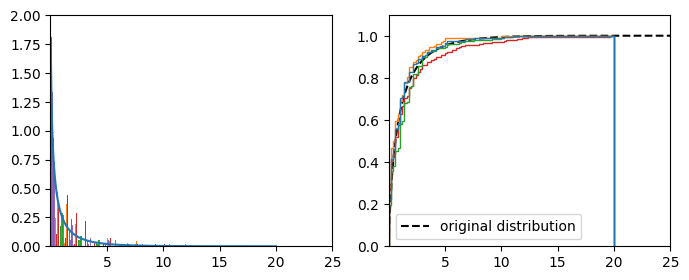

self.two_pop=False


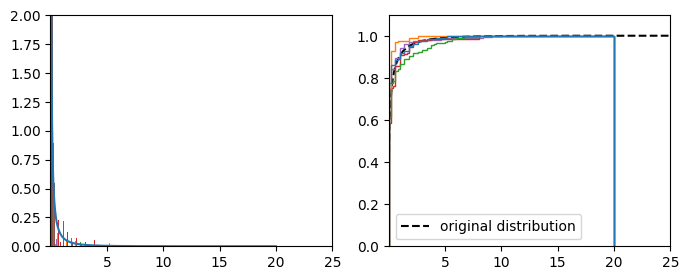

In [ ]:
from inference.BayesModel import *
from empirical.readData import ModelParams

mP = ModelParams(mode="empirical", filePath="../../../data/BuscheLab/2P_data.xlsx")
ref_values = {
    "distr": [{"gamma": 1.7, "delta": 4.5, "nu_max": 20.0}],
    "T": 120,
    "N": 100,
}
mP.plot_rates(key="WT", param_in=ref_values)

ref_values = {
    "distr": [{"gamma": 1.3, "delta": 4.5, "nu_max": 20.0}],
    "T": 120,
    "N": 100,
}
mP.plot_rates(key="cTKO", param_in=ref_values)

# mP = ModelParams(mode="artificial", parameter=ref_values, nAnimals=1)
# mP.plot_rates()

In [27]:
mP.rates

mouse type        WT                                       LM (APLP1 KO)  \
mouse_ID   20180310A 20180312A 20180310B 20180401 20180325 (app ko7 739)   
0                0.0       0.0       0.0      0.0                    0.0   
1                0.0       0.0       0.0      0.0                    0.0   
2                0.0       0.0       0.0      0.0                    0.0   
3                0.0       0.0       0.0      0.0                    0.0   
4                0.0       0.0       0.0      0.0                    0.0   
..               ...       ...       ...      ...                    ...   
365              NaN       NaN       NaN      NaN                    NaN   
366              NaN       NaN       NaN      NaN                    NaN   
367              NaN       NaN       NaN      NaN                    NaN   
368              NaN       NaN       NaN      NaN                    NaN   
369              NaN       NaN       NaN      NaN                    NaN   

mouse type                                                   \
mouse_ID   20180325A (app ko8 740) 20180402A (app ko13 734)   
0                              0.0                      0.0   
1                              0.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      0.0   
4                              0.0                      0.0   
..                             ...                      ...   
365                            NaN                      NaN   
366                            NaN                      NaN   
367                            NaN                      NaN   
368                            NaN                      NaN   
369                            NaN                      NaN   

mouse type                             cTKO                              \
mouse_ID   20180419 (app ko14 756) 20180309 20180310  20180311 20180329   
0                              0.0      0.0      0.0  0.000000      0.0   
1                              0.0      0.0      0.0  0.000000      0.0   
2                              0.0      0.0      0.0  0.000000      0.0   
3                              0.0      0.0      0.0  0.000000      0.0   
4                              0.0      0.0      0.0  0.000000      0.0   
..                             ...      ...      ...       ...      ...   
365                            NaN      NaN      NaN  6.153846      NaN   
366                            NaN      NaN      NaN  6.153846      NaN   
367                            NaN      NaN      NaN  6.923077      NaN   
368                            NaN      NaN      NaN  7.307692      NaN   
369                            NaN      NaN      NaN  8.076923      NaN   

mouse type            
mouse_ID   20180329A  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
..               ...  
365              NaN  
366              NaN  
367              NaN  
368              NaN  
369              NaN  

[370 rows x 13 columns]

In [ ]:
mP.rates[mP.rates == 0] = 1 / 1200.0
BM, res, sampler = run_sampling(
    mP,
    mode="dynesty",
    n_live=100,
    correct_N=5,
    bias_to_expected_max=0.0,
    nP=12,
    key="WT",
)

running nested sampling


2167it [08:07,  4.45it/s, +100 | bound: 43 | nc: 1 | ncall: 65002 | eff(%):  3.493 | loglstar:   -inf < -5664.203 <    inf | logz: -5685.671 +/-  0.513 | dlogz:  0.009 >  1.000]


data in:
distr = [{}]
gamma_0 mean: 1.0127697154304942
delta_0 mean: 2.8878407560712716
nu_max_0 mean: 19.69924697888966


IndexError: list index out of range

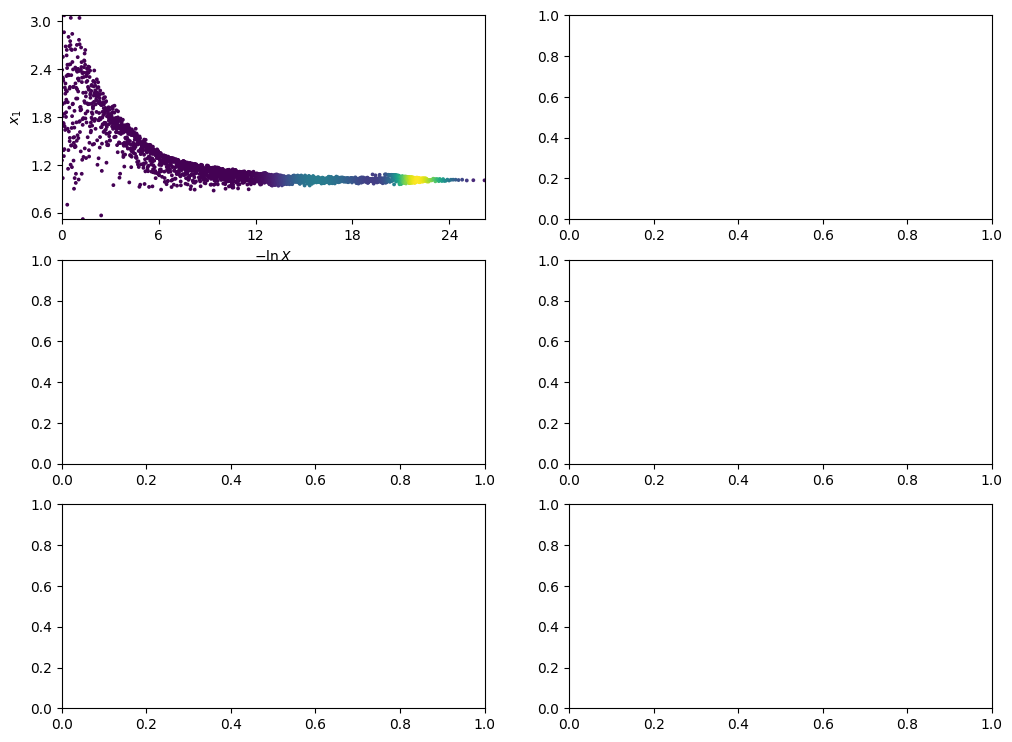

In [29]:
mP.params = {"distr": [{}]}
compare_results(BM, sampler, mP, mode="dynesty")

In [ ]:
I = Inference()
I.load_data(
    "empirical", filePath="../../data/BuscheLab/2P_data.xlsx", include_silent=True
)

column names: [['WT', '20180310A'], ['WT', '20180312A'], ['WT', '20180310B'], ['WT', '20180401'], ['LM (APLP1 KO)', '20180325 (app ko7 739)'], ['LM (APLP1 KO)', '20180325A (app ko8 740)'], ['LM (APLP1 KO)', '20180402A (app ko13 734)'], ['LM (APLP1 KO)', '20180419 (app ko14 756)'], ['cTKO', '20180309'], ['cTKO', '20180310'], ['cTKO', '20180311'], ['cTKO', '20180329'], ['cTKO', '20180329A']]


In [ ]:
np.nanmean(I.data, axis=0)

array([0.02513535, 0.02291495, 0.02907187, 0.0229821 , 0.02050152,
       0.02521005, 0.01770314, 0.02750562, 0.00504008, 0.00245684,
       0.00999529, 0.00798596, 0.00542036])

In [ ]:
I.prepare_data(withZeros=True)
logl = I.setLogLikelihood(counts=True)
nu_arr = np.linspace(1, 100, 100)
# %timeit logl(np.array([[1.25,3.6,nu] for nu in nu_arr]))
logl(np.array([[1.25, 5, nu] for nu in nu_arr]))

0.025135346424408875 [0.00594386 0.01188772 0.01783157 0.02377543 0.02971929 0.03566315
 0.041607   0.04755086 0.05349472 0.05943858 0.06538244 0.07132629
 0.07727015 0.08321401 0.08915787 0.09510172 0.10104558 0.10698944
 0.1129333  0.11887716 0.12482101 0.13076487 0.13670873 0.14265259
 0.14859644 0.1545403  0.16048416 0.16642802 0.17237188 0.17831573
 0.18425959 0.19020345 0.19614731 0.20209116 0.20803502 0.21397888
 0.21992274 0.22586659 0.23181045 0.23775431 0.24369817 0.24964203
 0.25558588 0.26152974 0.2674736  0.27341746 0.27936131 0.28530517
 0.29124903 0.29719289 0.30313675 0.3090806  0.31502446 0.32096832
 0.32691218 0.33285603 0.33879989 0.34474375 0.35068761 0.35663147
 0.36257532 0.36851918 0.37446304 0.3804069  0.38635075 0.39229461
 0.39823847 0.40418233 0.41012619 0.41607004 0.4220139  0.42795776
 0.43390162 0.43984547 0.44578933 0.45173319 0.45767705 0.46362091
 0.46956476 0.47550862 0.48145248 0.48739634 0.49334019 0.49928405
 0.50522791 0.51117177 0.51711563 0.52305

array([  -460.34661996,   -359.68818471,   -311.40997023,   -287.13822862,
         -279.87294981,   -286.96714259,   -307.18008165,   -339.84741409,
         -384.579295  ,   -441.13107459,   -509.34109691,   -589.09810679,
         -680.32292934,   -782.957671  ,   -896.9589887 ,  -1022.29378909,
        -1158.93636574,  -1306.86644949,  -1466.06784654,  -1636.52746606,
        -1818.23461205,  -2011.18046704,  -2215.35770071,  -2430.76016375,
        -2657.38267041,  -2895.22081487,  -3144.27083269,  -3404.52949002,
        -3675.99399459,  -3958.66192419,  -4252.53116895,  -4557.5998833 ,
        -4873.86644654,  -5201.3294309 ,  -5539.98757455,  -5889.83975854,
        -6250.88498796,  -6623.12237582,  -7006.55112916,  -7401.17053713,
        -7806.9799612 ,  -8223.97882689,  -8652.16661652,  -9091.54286267,
        -9542.10714218, -10003.85907099, -10476.79829881, -10960.92450919,
       -11456.23741303, -11962.73674686, -12480.42227   , -13009.29376227,
       -13549.35102215, -

0.025135346424408875
0.02291494734237243
0.029071867244492542
0.022982103398144806
0.020501515763083535
0.025210050592053928
0.017703135699740073
0.02750561642225102
0.0050400839854934055
0.0024568438050773986
0.00999528712622421
0.00798595572351227
0.005420355622784763


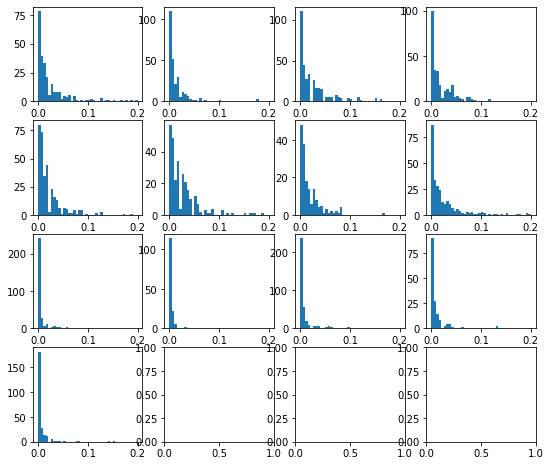

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(9, 8))

for i in range(13):
    ax[i // 4][i % 4].hist(I.data[:, i], bins=np.linspace(0, 0.2, 41))
    print(np.nanmean(I.data[:, i]))

plt.show()

In [ ]:
int_args = (1.2, 3.6, 42.0, 0, 10.0, True)
eps_pow = -4
res = quad(f, 0, int_args[2], args=int_args, full_output=1)[0]
# res2 = quadpy.quad(f,0,int_args[2],args=int_args,epsabs=10**eps_pow, epsrel=10**eps_pow,limit=100)

print(res)

0.24552105997946977


In [8]:
## I.prepare_data(withZeros=False)
logl = I.setLogLikelihood(counts=False)
trafo = I.setPriorTransform()
%timeit trafo(np.array([0.5,0.5,0.5]))
%timeit logl(np.array([[1.5,4.0,42.]])*np.ones((100,1)))

245 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
731 ms ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
logl = I.setLogLikelihood(counts=False)
nu_arr = np.linspace(1, 100, 10)
logl(np.array([[0.85, 3.6, nu] for nu in nu_arr]))

/tmp/ipykernel_55675/3224483873.py:4: RuntimeWarning: invalid value encountered in sqrt
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \
/tmp/ipykernel_55675/3224483873.py:6: RuntimeWarning: invalid value encountered in sqrt
  np.cosh( gamma * delta * np.sqrt( -2 * np.log( nu / nu_max) ) )


array([-10000.        ,   -211.59306986,   -188.69531547,   -178.10453863,
         -171.75492254,   -167.45974944,   -164.34150901,   -161.96988453,
         -160.10576313,   -158.60431148])

<IPython.core.display.Javascript object>


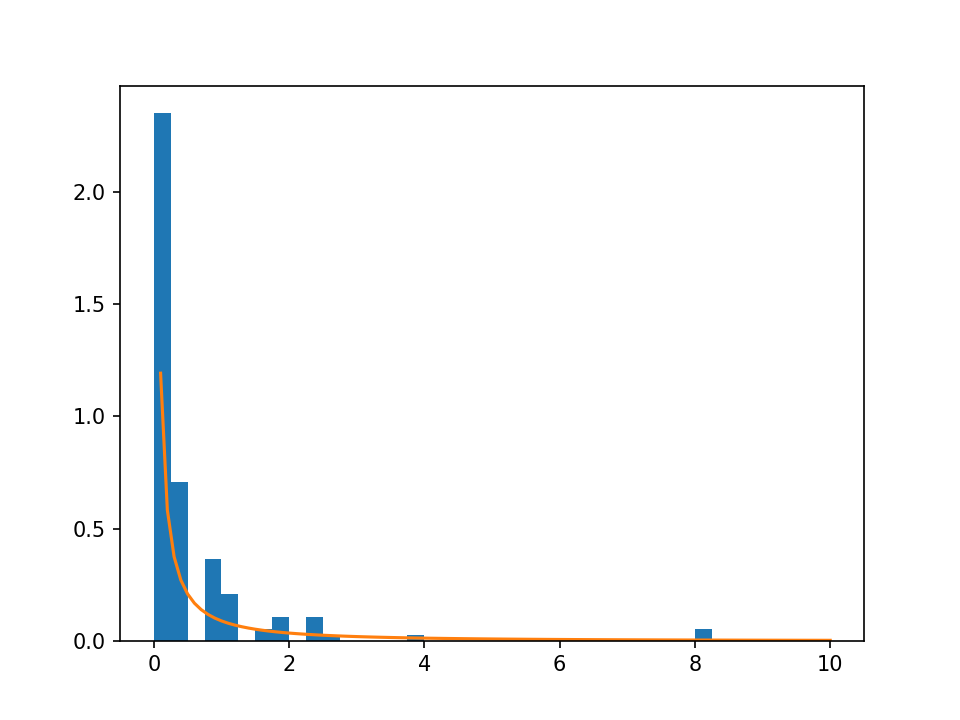

In [ ]:
plt.figure()
nu_arr = np.linspace(0, 10, 101)
plt.hist(I.data[:, 11], bins=np.linspace(0, 10, 41), density=True)
plt.plot(
    nu_arr, p_nu(nu_arr, 1.0555533143135498, 3.863825990269352, 31.754181457663485)
)
# plt.ylim([-1500,-200])
plt.show()

In [ ]:
import pickle
import multiprocessing as mp
from general.transformParas import *

add_args = {
    "nu_I_scale": 1.0,
    "tau_M": 0.01,
    "tau_A": 0.006,
    "tau_N": 0.160,
    "tau_G": 0.004,
    "kappa_E": 4.0,
}
fileName = "points_transformed"
for key, val in add_args.items():
    fileName += f"_{key}={val}"
fileName += ".pkl"

tP = transformParas()
tP.updateParas(add_args)

for i in range(0, 13):
    time_start = time.time()
    dirName = "./logs_animal_%i/run5" % i

    storeName = os.path.join(dirName, "results", fileName)
    data = {}
    try:
        _, result = ultranest.read_file(dirName, 3)
        data["points"] = result["weighted_samples"]["points"][1:-1, :]
        data["weights"] = result["weighted_samples"]["weights"][1:-1]
    except:
        f = open(b"./logs_animal_%i/run5/results/points_transformed.pkl" % i, "rb")
        data = pickle.load(f)

    pool = mp.get_context("spawn").Pool(12)
    data["points_transformed"] = np.array(
        pool.starmap(tP.returnParas, zip(data["points"]))
    )

    f = open(storeName, "wb")
    pickle.dump(data, f)
    dt = time.time() - time_start
    print(f"points transformed and stored to {storeName} in t={dt}s")

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_0/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=91.253897190094s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_1/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=70.33001780509949s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_2/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=69.11912441253662s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_3/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=76.23559355735779s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_4/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=161.77237486839294s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_5/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=142.2202377319336s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_6/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=101.8764066696167s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_7/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=86.4789924621582s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_8/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=62.944685220718384s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_9/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=58.03831958770752s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_10/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=64.95737028121948s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_11/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=59.94519853591919s


/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:60: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


points transformed and stored to ./logs_animal_12/run5/results/points_transformed_nu_I_scale=1.0_tau_M=0.01_tau_A=0.006_tau_N=0.16_tau_G=0.004_kappa_E=4.0.pkl in t=56.94319820404053s


FileNotFoundError: [Errno 2] No such file or directory: './logs_animal_0/run4/results/points_transformed_nu_I=1.0_tau_M=0.005_tau_A=0.001_tau_N=0.2_tau_G=0.02_kappa_E=4.0.pkl'

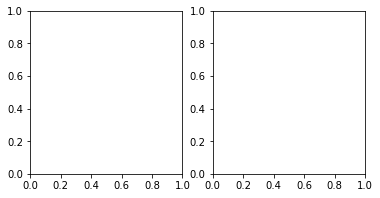

In [ ]:
from scipy.stats import gaussian_kde

add_args = {
    "nu_I": 1.0,
    "tau_M": 0.005,
    "tau_A": 0.001,
    "tau_N": 0.2,
    "tau_G": 0.02,
    "kappa_E": 4.0,
}
fileName = "points_transformed"
for key, val in add_args.items():
    fileName += f"_{key}={val}"
fileName += ".pkl"

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

bins = np.linspace(0, 1, 201)
dbin = np.diff(bins)[0]
post = []
for i in range(13):
    # try:
    filePath = f"./logs_animal_{i}/run4/results/{fileName}"
    f = open(filePath, "rb")
    print("loading data from " + filePath)
    data_load = pickle.load(f)
    if i > 7:
        col = "r"
        pos = 2.2
        if i == 8:
            post.append([])
            offset = -0.4
    elif i > 3:
        continue
        col = "g"
        pos = 0
        if i == 4:
            post.append([])
            offset = -0.3
    else:
        col = "g"
        pos = 0.8
        if i == 0:
            post.append([])
            offset = -0.3

    p = data_load["points_transformed"][:, 2]
    w = data_load["weights"]
    ax[0].hist(
        p,
        weights=w,
        bins=bins,
        color=col,
        histtype="step",
        density=True,
        cumulative=True,
    )

    h_data, _ = np.histogram(p, bins=bins, weights=w, density=True)
    p_mean = np.dot(p[~np.isnan(p)], w[~np.isnan(p)])
    print(np.dot(h_data, bins[1:]) / 200, p_mean)
    h_data[h_data < (0.1)] = np.NaN
    h_data = h_data / np.nanmax(h_data) * 0.08
    # print((p*w).shape)
    # p_mean = np.nansum(p*w)
    p_var = np.sqrt(np.nansum(p**2 * w) - p_mean**2)
    # offset = np.random.randn()*0.2

    kde = gaussian_kde(p[~np.isnan(p)], bw_method=0.1, weights=w[~np.isnan(p)])
    posterior = kde(bins[1:])
    post[-1].append(kde)
    posterior = posterior / np.max(posterior) * 0.08
    # ax[1].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
    #                 showextrema=True, showmedians=True, bw_method=0.5)
    # ax[1].fill_betweenx(bins[1:],pos+offset-h_data,pos+offset,color=col)
    ax[1].fill_betweenx(bins[1:], pos + offset - posterior, pos + offset, color=col)
    ax[1].fill_betweenx(bins[1:], pos + offset, pos + offset + posterior, color=col)

    ax[1].scatter(pos + offset, p_mean, c="k", s=10)
    ax[1].errorbar(pos + offset, p_mean, p_var, color="k")
    offset += 0.2
    # except:
    #    pass
plt.setp(
    ax[1], xlim=[0, 3], ylim=[0, 1], xticks=[1, 2], xticklabels=["APLP1KO", "cTKO"]
)

plt.show()

In [ ]:
from scipy.stats import entropy

ent = np.zeros((len(post), len(post), 5, 5)) * np.NaN
bins = np.linspace(0, 1, 101)
for animal_type in range(len(post)):
    for animal_type_compare in range(len(post)):
        for animal in range(len(post[animal_type])):
            for animal_compare in range(len(post[animal_type_compare])):
                distr_ref = post[animal_type][animal](bins)
                distr_comp = post[animal_type_compare][animal_compare](bins)

                distr_ref /= distr_ref.sum()
                distr_comp /= distr_comp.sum()

                ent[animal_type][animal_type_compare][animal][animal_compare] = entropy(
                    distr_ref, distr_comp
                )

In [29]:
ent

array([[[[0.        , 0.17978529, 0.12488326, 0.42246353,        nan],
         [0.19955297, 0.        , 0.25595265, 0.77863195,        nan],
         [0.18743536, 0.48061904, 0.        , 0.32380115,        nan],
         [0.56310225, 1.20507062, 0.15309193, 0.        ,        nan],
         [       nan,        nan,        nan,        nan,        nan]],

        [[0.79555255, 0.4934466 , 0.33233159, 0.28237085, 0.65182853],
         [0.34014519, 0.18313438, 0.07893497, 0.0587586 , 0.24985976],
         [0.89985205, 0.54180935, 0.40851808, 0.36649706, 0.73232891],
         [1.71179817, 1.17831253, 1.03424038, 0.97887141, 1.48150968],
         [       nan,        nan,        nan,        nan,        nan]]],


       [[[1.06620037, 0.49767617, 0.89806375, 2.33093708,        nan],
         [0.70090212, 0.33695178, 0.60908221, 1.78544175,        nan],
         [0.44964043, 0.22579158, 0.39291966, 1.4968768 ,        nan],
         [0.39847367, 0.15413788, 0.35634893, 1.2734146 ,        nan],


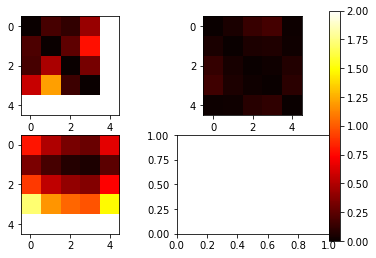

In [ ]:
fig, ax = plt.subplots(2, 2)
im = ax[0][0].imshow(ent[0, 0], cmap="hot", clim=[0, 2])
ax[0][1].imshow(ent[1, 1], cmap="hot", clim=[0, 2])
ax[1][0].imshow(ent[0, 1], cmap="hot", clim=[0, 2])
# ax[1][1].imshow(ent[1,0],cmap='hot',clim=[0,2])

cax = plt.axes([0.9, 0.1, 0.025, 0.8])
plt.colorbar(im, cax=cax)
plt.show()

<IPython.core.display.Javascript object>


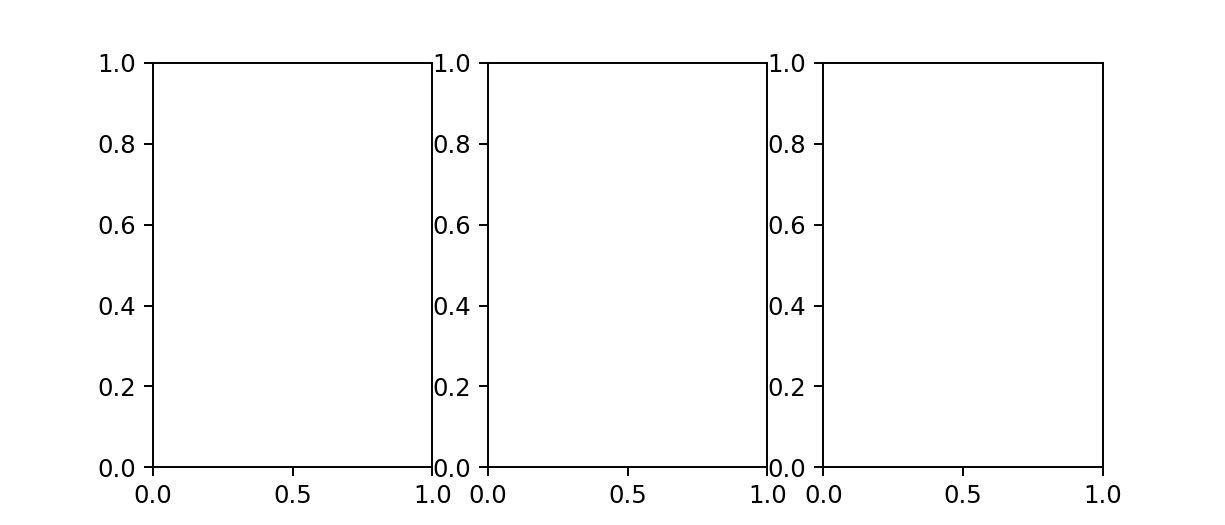

TypeError: __init__() got an unexpected keyword argument 'nu_I_scale'

In [12]:
import pickle
import multiprocessing as mp
from general.transformParas import *
from scipy.stats import gaussian_kde
%matplotlib nbagg

col = ['tab:blue','b','tab:orange']

types = ['APLP1KO','WT','cTKO']#np.unique(types)
type_idx = np.array([0,0,0,0,1,1,1,1,2,2,2,2,2])

#add_args = {'nu_I':2.,'tau_M':0.01,'tau_A':0.001,'tau_N':0.2,'tau_G':0.02,'kappa_E':4.}
#add_args = {'nu_I':2.,'tau_M':0.01,'tau_A':0.001,'tau_N':0.2,'tau_G':0.02,'kappa_E':4.}
#add_args = {'nu_I':2.,'tau_M':0.01,'tau_A':0.0002,'tau_N':0.2,'tau_G':0.02,'kappa_E':4.}
add_args = {'nu_I_scale':1.,'tau_M':0.01,'tau_A':0.006,'tau_N':0.2,'tau_G':0.004,'kappa_E':4.}

fileName = 'points_transformed'
for key,val in add_args.items():
    fileName += f"_{key}={val}"
fileName += '.pkl'

fig,ax = plt.subplots(1,3,figsize=(7,3))

r_arr = np.linspace(0,1,101)
tP = transformParas(**(add_args|{'nu_E':0.01}))
ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[0.8,0.8,0.8],lw=1,label='$\\bar{\\nu}=0.1$Hz')
#ax[1].plot(r_arr,get_nu_max(**(add_args|{'r':r_arr,'nu':0.5})),color=[0.4,0.4,0.4],lw=1,label='$\\nu=0.5$Hz')
tP = transformParas(**(add_args|{'nu_E':0.1}))
ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[0,0,0],lw=1,label='$\\bar{\\nu}=1$Hz')

r_res = []
r_res_silent = []

tau_res = []
tau_res_silent = []


plt_active_only = False
plt_with_silent = True

types_label = ['control','cTKO']

type_ct = np.zeros(len(types))

yLim = 60
bins_p = np.linspace(0,yLim,101)
bins_p_T = np.linspace(0,1,101)
plot_dist = 0.3

for i in range(13):
    idx_type = type_idx[i]
    
    if types[idx_type]=='WT':
        continue
        
    f = open(f"./logs_animal_{i}/run5/results/{fileName}",'rb')
    data_load = pickle.load(f)
    
    p = data_load['points'][:,2]
    #p = data_load['points_transformed'][:,0]
    p_T = data_load['points_transformed'][:,2]
    w = data_load['weights']
    
    nData = len(p)
    
    w /= np.sum(w[~np.isnan(p)])
    p_mean = np.nansum(p*w)/np.sum(w[~np.isnan(p)])
    p_var = np.sqrt(np.nansum(p**2*w) - p_mean**2)
    
    w /= np.sum(w[~np.isnan(p_T)])
    p_T_mean = np.nansum(p_T*w)
    p_T_var = np.sqrt(np.nansum(p_T**2*w) - p_T_mean**2)
    
    
    nAnimals = (type_idx==idx_type).sum()
    x_pos = idx_type - nAnimals/2*plot_dist + type_ct[idx_type]*plot_dist + np.random.randn(nData)*0.025
    
    kde_p = gaussian_kde(p[~np.isnan(p)], bw_method='scott', weights=w[~np.isnan(p)])
    posterior_p = kde_p(bins_p)
    posterior_p = posterior_p/np.nanmax(posterior_p) * 0.2
    posterior_p[posterior_p<0.005] = np.NaN
    
    ax[0].fill_betweenx(bins_p,x_pos[0]-posterior_p,x_pos[0],color=col[idx_type],alpha=0.2)
    #ax[0].fill_betweenx(bins_p,x_pos[0]+posterior_p,x_pos[0],color=col[idx_type],alpha=0.2)
    
    ax[0].scatter(x_pos[0],p_mean,s=6,c='k')
    ax[0].errorbar(x_pos[0],p_mean,p_var,color='k',linewidth=0.5)
    
    
    ax[1].scatter(p_T,p,s=w*300,c=col[idx_type],marker='.',linewidth=0,facecolor='r')
    
    ax[1].scatter(p_T_mean,p_mean,s=6,c=col[idx_type])
    ax[1].errorbar(p_T_mean,p_mean,p_var,p_T_var,color=col[idx_type],linewidth=0.5)
    
    
    kde_p_T = gaussian_kde(p_T[~np.isnan(p_T)], bw_method='scott', weights=w[~np.isnan(p_T)])
    posterior_p_T = kde_p_T(bins_p_T)
    posterior_p_T = posterior_p_T/np.nanmax(posterior_p_T) * 0.2
    posterior_p_T[posterior_p_T<0.005] = np.NaN
    
    ax[2].fill_betweenx(bins_p_T,x_pos[0]-posterior_p_T,x_pos[0],color=col[idx_type],alpha=0.2)
    #ax[2].fill_betweenx(bins_p_T,x_pos[0]+posterior_p_T,x_pos[0],color=col[idx_type],alpha=0.2)
    
    ax[2].scatter(x_pos[0],p_T_mean,s=6,c='k')
    ax[2].errorbar(x_pos[0],p_T_mean,p_T_var,color='k',linewidth=0.5)
    
    type_ct[idx_type] += 1

plt.setp(ax[0],xlim=[-1,3],ylim=[0,yLim],
         ylabel='$\\nu^{max}$ [Hz]',
         #xticks=range(len(types_unq_label)),
         xticks=[0,2],
         xticklabels=types_label)
#plt.setp(ax[1],xlim=[0,ax[1].get_xlim()[1]],ylim=[0,ax[0].get_ylim()[1]],xlabel='$\\tau_I$')
plt.setp(ax[1],ylim=[0,yLim],xlabel='$r_{NMDA}$')
plt.setp(ax[2],xlim=[-1,3],ylim=[0,1],
         ylabel='$r_{NMDA}$',
         #xticks=range(len(types_unq_label)),
         xticks=[0,2],
         xticklabels=types_label)
plt.setp(ax[0].get_xticklabels(), rotation=60)
plt.setp(ax[2].get_xticklabels(), rotation=60)

ax[0].spines[['top','right']].set_visible(False)
ax[1].spines[['top','right']].set_visible(False)
ax[2].spines[['top','right']].set_visible(False)

#ax[0].legend()
#ax[1].legend()
#ax[1].set_title('single synapse',fontsize=10)
#ax[1].set_title('mixed synapses',fontsize=10)
ax[1].legend()
plt.tight_layout()
#fig.savefig("../figures/Busche_inference_results_new.pdf", bbox_inches='tight')
plt.show()

In [8]:
I.prepare_data(animal=12)
I.rates

array([0.32967033, 0.32967033, 0.32967033, 0.32967033, 0.38461538,
       0.38461538, 0.38461538, 0.38461538, 0.38461538, 0.38461538,
       0.38461538, 0.38461538, 0.38461538, 0.38461538, 0.38461538,
       0.38461538, 0.38461538, 0.38461538, 0.38461538, 0.38461538,
       0.38461538, 0.38461538, 0.38461538, 0.38461538, 0.38461538,
       0.38461538, 0.38461538, 0.65934066, 0.65934066, 0.76923077,
       0.76923077, 0.76923077, 0.76923077, 0.76923077, 0.76923077,
       0.76923077, 0.76923077, 0.76923077, 0.76923077, 0.76923077,
       0.76923077, 1.15384615, 1.15384615, 1.15384615, 1.15384615,
       1.15384615, 1.15384615, 1.15384615, 1.15384615, 1.15384615,
       1.15384615, 1.15384615, 1.53846154, 1.53846154, 1.53846154,
       1.53846154, 1.53846154, 1.92307692, 1.92307692, 2.30769231,
       2.69230769, 3.07692308, 4.61538462, 5.        , 8.46153846,
       9.23076923])

<IPython.core.display.Javascript object>


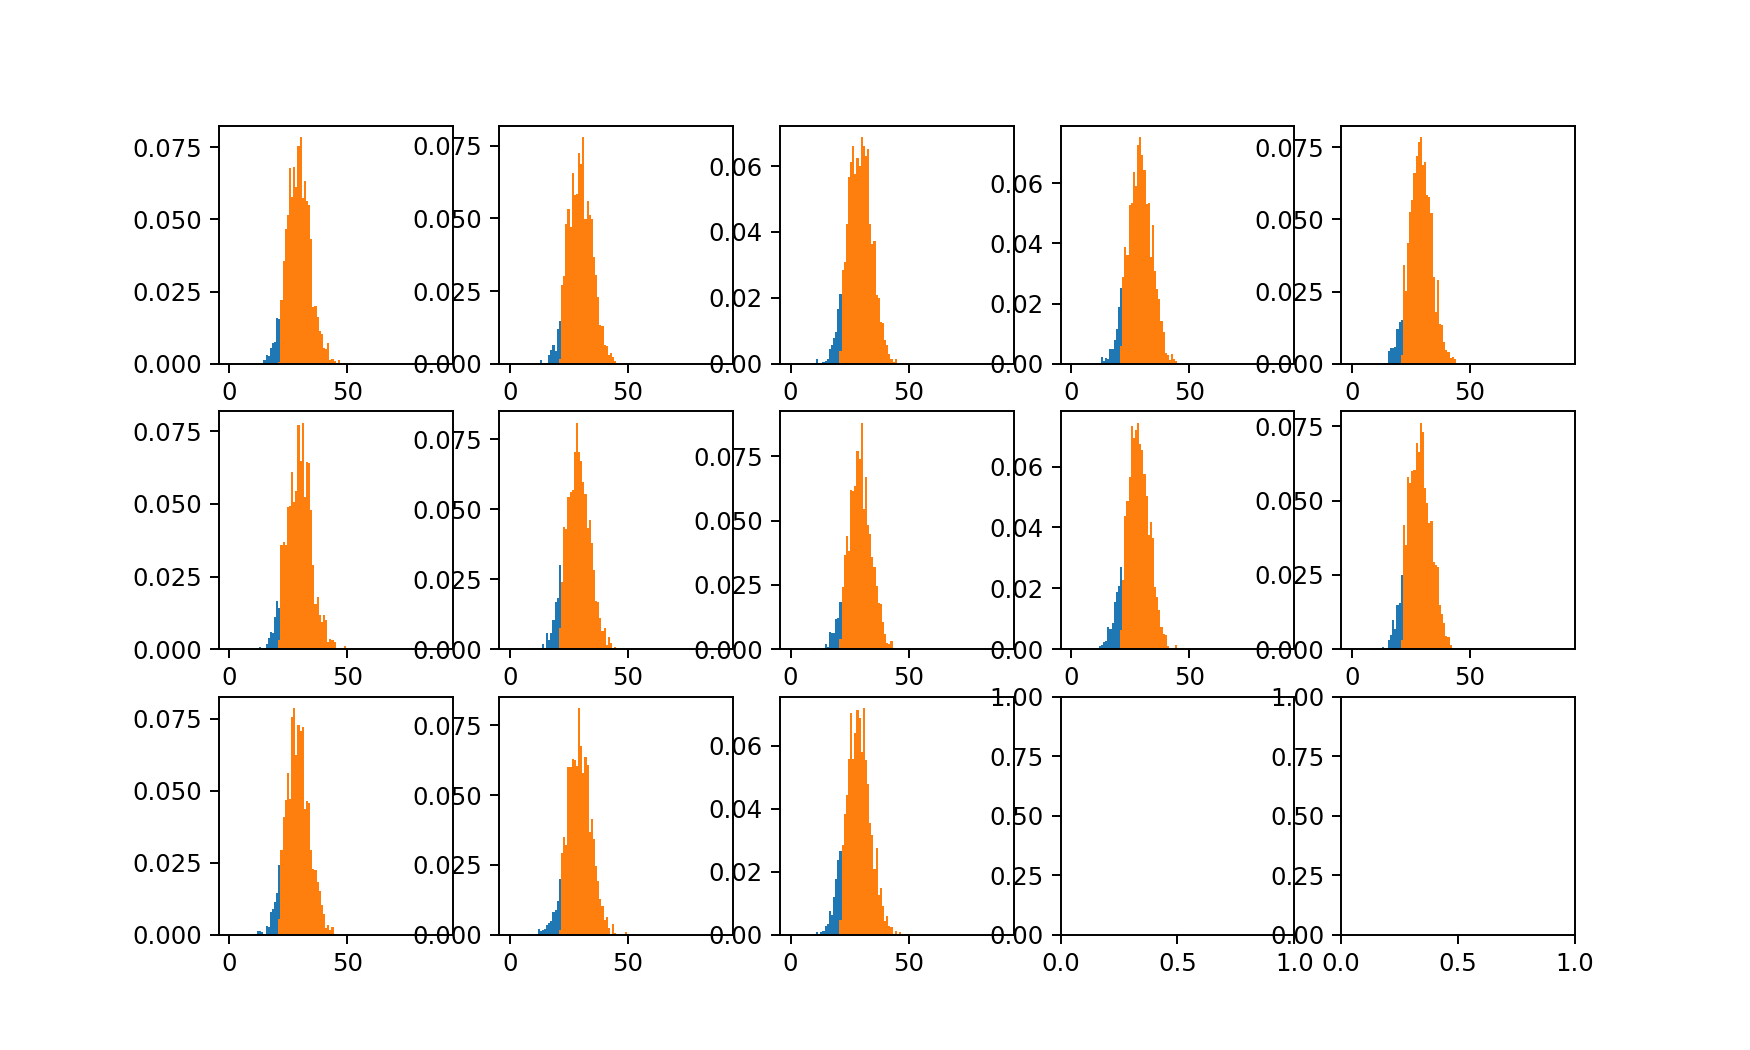

weight of unused data (animal 0): 0.9410819467299556
weight of unused data (animal 1): 0.9537780345031599
weight of unused data (animal 2): 0.9336803778806965
weight of unused data (animal 3): 0.9255885523452372
weight of unused data (animal 4): 0.9399533418721858
weight of unused data (animal 5): 0.9428802853314261
weight of unused data (animal 6): 0.9143190218496948
weight of unused data (animal 7): 0.9393265547317535
weight of unused data (animal 8): 0.894404113490375
weight of unused data (animal 9): 0.92080220209407
weight of unused data (animal 10): 0.9296083732518108
weight of unused data (animal 11): 0.9334971595926909
weight of unused data (animal 12): 0.9031675780984368


In [ ]:
# add_args = {'nu_I':1.,'tau_M':0.005,'tau_A':0.001,'tau_N':0.2,'tau_G':0.02,'kappa_E':4.}
# add_args = {'nu_I':2.,'tau_M':0.01,'tau_A':0.0002,'tau_N':0.2,'tau_G':0.02,'kappa_E':4.}
add_args = {
    "nu_I_scale": 1.0,
    "tau_M": 0.01,
    "tau_A": 0.005,
    "tau_N": 0.2,
    "tau_G": 0.02,
    "kappa_E": 4.0,
}

fileName = "points_transformed"
for key, val in add_args.items():
    fileName += f"_{key}={val}"
fileName += ".pkl"


ncols = 5
nrows = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 6))

for a in range(13):
    f = open(f"./logs_animal_{a}/run4/results/{fileName}", "rb")
    data_load = pickle.load(f)

    p = data_load["points"][:, 2]
    p_T = data_load["points_transformed"][:, 2]
    w = data_load["weights"]

    mask = np.isnan(p_T)
    print(f"weight of unused data (animal {a}): {w[mask].sum()}")

    ax[a // ncols][a % ncols].hist(p, weights=w, bins=np.linspace(0, 90, 101))
    ax[a // ncols][a % ncols].hist(
        p[mask], weights=w[mask], bins=np.linspace(0, 90, 101)
    )

#    ax[a//ncols][a%ncols].hist(p_T,weights=w,bins=np.linspace(0,1,101))
#    ax[a//ncols][a%ncols].hist(p_T[mask],weights=w[mask],bins=np.linspace(0,1,101))
plt.show()

<IPython.core.display.Javascript object>


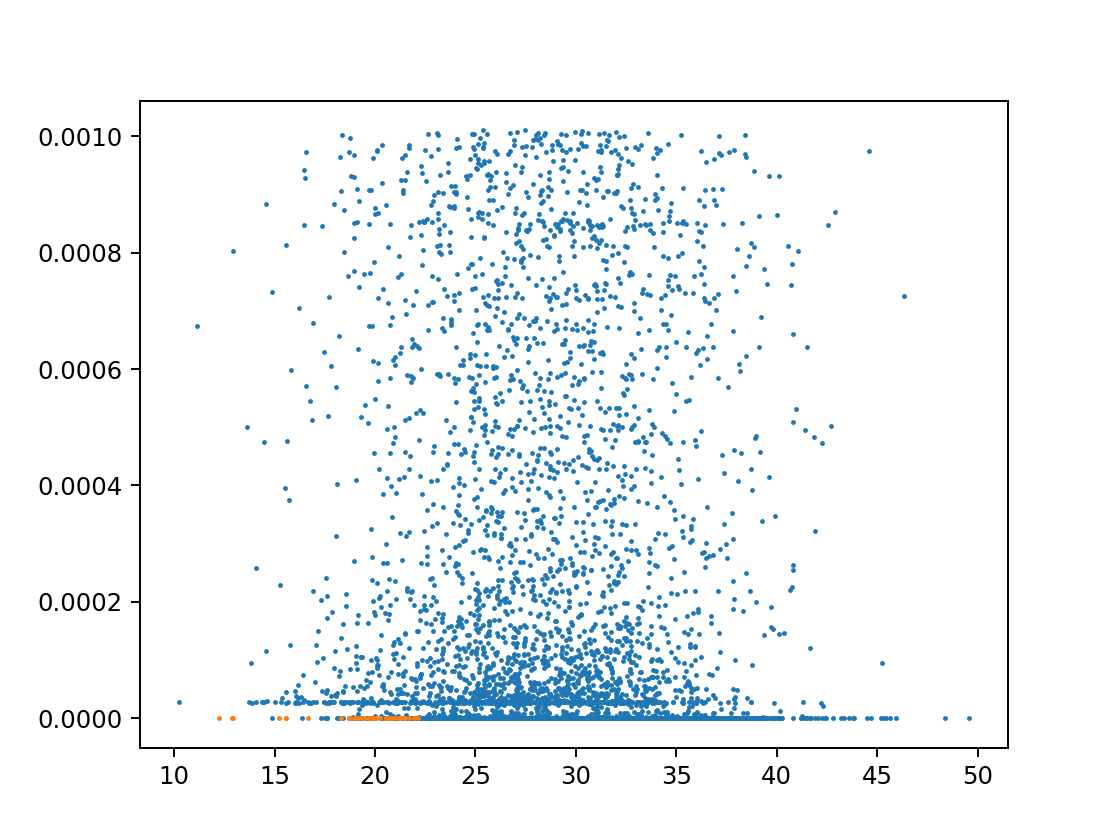

In [18]:
%matplotlib nbagg
plt.figure()
mask = np.isnan(p_T)
plt.scatter(p[mask],w[mask],s=1)
plt.scatter(p[~mask],w[~mask],s=1)
plt.show()

In [161]:
w[mask].sum()

0.030448420154973125

In [ ]:
np.dot(p, w)

20.51744720576056

<IPython.core.display.Javascript object>


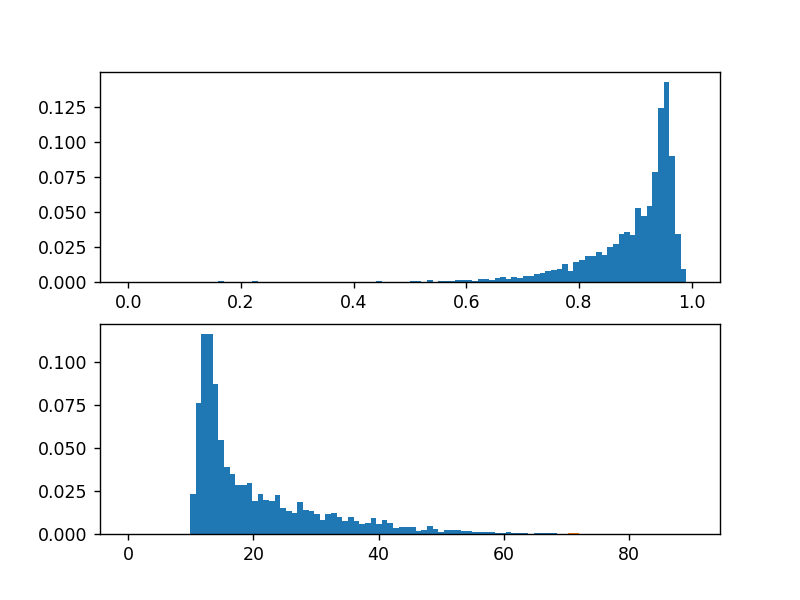

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(p_T, weights=w, bins=np.linspace(0, 1, 101))
ax[1].hist(p, weights=w, bins=np.linspace(0, 90, 101))
ax[1].hist(p[mask], weights=w[mask], bins=np.linspace(0, 90, 101))
plt.show()

In [ ]:
seq, res = ultranest.read_file("./logs_animal_12/run1", 3)

In [ ]:
data = {}
data["points"] = result["weighted_samples"]["points"]
data["weights"] = result["weighted_samples"]["weights"]
import pickle

f = open(b"./logs_animal_12/run2/results/points_transformed.pkl", "wb")
pickle.dump(data, f)

NameError: name 'result' is not defined

In [ ]:
f = open(b"./logs_animal_12/run2/results/points_transformed.pkl", "rb")
data_load = pickle.load(f)

In [18]:
data_load

{'points': array([[ 0.09404946,  4.76388791, 58.55535609],
        [ 2.78155089,  3.49039812, 44.1872402 ],
        [ 2.63469588,  3.43534193, 54.17442612],
        ...,
        [ 0.82478793,  2.77930795, 10.00872929],
        [ 0.87059737,  2.92048178, 10.0301258 ],
        [ 0.83560455,  2.83143987, 10.03235884]]),
 'weights': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.75499378e-05, 3.81110993e-05, 3.87115355e-05])}

In [ ]:
logp_prior = np.log(
    -0.5 * (np.diff(np.exp(seq["logvol"][1:])) + np.diff(np.exp(seq["logvol"][:-1])))
)

data = {}
data["logX"] = np.array(seq["logvol"][1:-1])
data["logl"] = np.array(seq["logl"][1:-1])
data["logZ"] = np.array(seq["logz"][1:-1])
data["logp_posterior"] = logp_prior + data["logl"] - data["logZ"][-1]
data["samples"] = seq["samples"][1:-1, :]

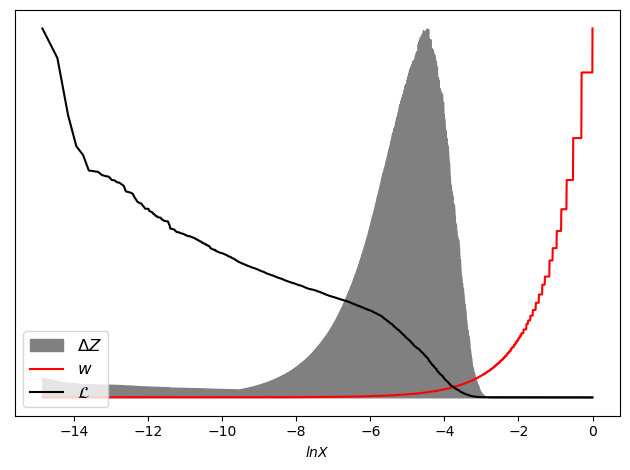

In [ ]:
plt.figure()
ax1 = plt.subplot(111)

dZ = np.diff(np.exp(data["logZ"]))
ax1.fill_between(
    data["logX"][1:], dZ / dZ.max(), color=[0.5, 0.5, 0.5], zorder=0, label="$\Delta Z$"
)

w = np.exp(logp_prior)
ax1.plot(data["logX"], w / w.max(), "r", zorder=5, label="$w$")

L = np.exp(data["logl"])
ax1.plot(data["logX"], L / L.max(), "k", zorder=10, label="$\mathcal{L}$")

ax1.set_yticks([])
ax1.set_xlabel("$ln X$")
plt.legend(fontsize=12, loc="lower left")
plt.tight_layout()
plt.show()

0.8661106807411683
4.055597340017992
197.28401662707603


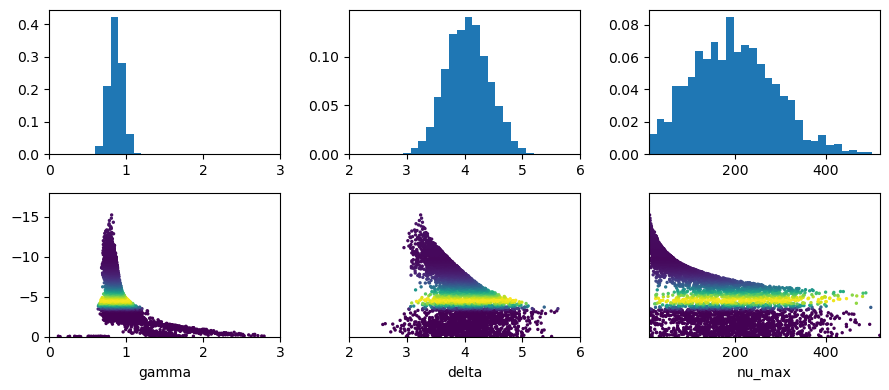

In [ ]:
data["samples"].shape
data["logX"].shape
fig, ax = plt.subplots(2, 3, figsize=(9, 4))

labels = ["gamma", "delta", "nu_max"]
for i in range(3):
    points = result["weighted_samples"]["points"][:, i]
    weights = result["weighted_samples"]["weights"]

    print((points * weights).sum())
    data_min = np.floor(min(points))
    data_max = np.ceil(max(points))

    bins = np.linspace(data_min, data_max, 31)

    ax[0, i].hist(points, weights=weights, bins=bins)
    plt.setp(ax[0, i], xlim=[data_min, data_max])

    ax[1, i].scatter(
        data["samples"][:, i], data["logX"], c=np.exp(data["logp_posterior"]), s=2
    )
    plt.setp(ax[1, i], xlim=[data_min, data_max], ylim=[0, -18], xlabel=labels[i])
    if i > 0:
        ax[1, i].set_yticks([])
    plt.tight_layout()
plt.show()

0.8661106807411683
4.055597340017992
197.28401662707603


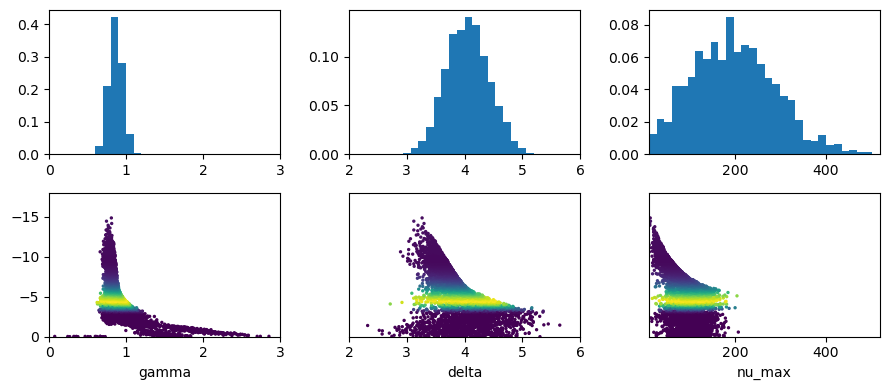

In [ ]:
data["samples"].shape
data["logX"].shape
fig, ax = plt.subplots(2, 3, figsize=(9, 4))

labels = ["gamma", "delta", "nu_max"]
for i in range(3):
    points = result["weighted_samples"]["points"][:, i]
    weights = result["weighted_samples"]["weights"]

    print((points * weights).sum())
    data_min = np.floor(min(points))
    data_max = np.ceil(max(points))

    bins = np.linspace(data_min, data_max, 31)

    ax[0, i].hist(points, weights=weights, bins=bins)
    plt.setp(ax[0, i], xlim=[data_min, data_max])

    ax[1, i].scatter(
        data["samples"][:, i], data["logX"], c=np.exp(data["logp_posterior"]), s=2
    )
    plt.setp(ax[1, i], xlim=[data_min, data_max], ylim=[0, -18], xlabel=labels[i])
    if i > 0:
        ax[1, i].set_yticks([])
    plt.tight_layout()
plt.show()

In [ ]:
np.exp(data["logp_posterior"])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       5.08754357e-05, 5.15193706e-05, 2.61609740e-05])

In [ ]:
result["weighted_samples"]["weights"]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       5.15139444e-05, 5.23164373e-05, 5.30061570e-05])

<IPython.core.display.Javascript object>


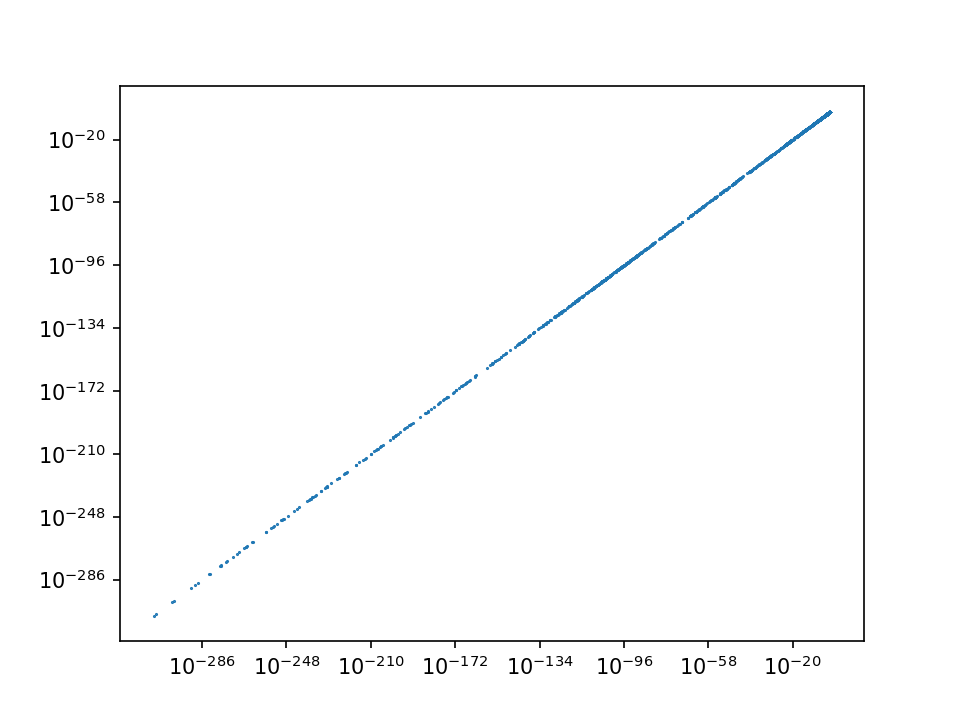

In [ ]:
plt.figure()
plt.plot(
    result["weighted_samples"]["weights"][1:-1],
    np.exp(data["logp_posterior"]),
    ".",
    markersize=1,
)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
# import multiprocessing as mp
from general.transformParas import *

add_args = {
    "nu_I": 2.0,
    "tau_M": 0.01,
    "tau_A": 0.001,
    "tau_N": 0.2,
    "tau_G": 0.02,
    "r": 0.0,
    "kappa_E": 4.0,
}
tP = transformParas()
tP.updateParas(add_args)

# print(r)
# r = np.zeros(data['samples'].shape[0])
# for i,(g,d,n) in enumerate(data['samples']):
#    tP.updateParas({'gamma':g,'delta':d,'nu_max':n})
#    r[i] = tP.get_r_NMDA()

In [ ]:
# run with multiple processors
pool = mp.get_context("spawn").Pool(12)
r = pool.starmap(tP.returnParas, zip(data["samples"]))

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:55: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:55: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/general/transformParas.py:55: RuntimeWarning: invalid value encountered in sqrt
  self.alpha_0 = np.sqrt(self.J_0**2 * ( self.nu_mean/ (2 * self.gamma**2 * (self.tau_A + self.tau_M)) - q))


In [292]:
r = np.array(r)

# Watch out: nu_max is defined in spikes/minute, not seconds. timescales are in secs -> consolidate!

In [ ]:
add_args = {
    "nu": 1.0,
    "nu_I": 2.0,
    "tau_M": 0.01,
    "tau_A": 0.001,
    "tau_N": 0.2,
    "r": 0.0,
    "kappa_E": 1.0,
}
tP = transformParas()
tP.updateParas(add_args)
# tP.get_r_NMDA()
tP.returnParas({"gamma": [1.0555, 1.4], "delta": [3.2, 4.5], "nu_max": [27.0, 35]})

KeyError: 0

In [ ]:
fig, ax = plt.subplots(1, 2)
bins = np.linspace(0, 1, 51)
ax[0].hist(r[:, 2], bins=bins)
ax[1].hist(r[:, 2], weights=result["weighted_samples"]["weights"][1:-1], bins=bins)
plt.show()

In [ ]:
result["weighted_samples"]["weights"].shape

In [ ]:
nA = 13  # I.data.shape[1]
res = {
    "gamma": {
        "mean": np.zeros(nA),
        "std": np.zeros(nA),
    },
    "delta": {
        "mean": np.zeros(nA),
        "std": np.zeros(nA),
    },
    "nu_max": {
        "mean": np.zeros(nA),
        "std": np.zeros(nA),
    },
}

for a in range(13):  # I.data.shape[1]):
    fname = f"./logs_animal_{a}/run3/info/results.json"
    with open(fname) as f:
        data = json.load(f)

        for i, key in enumerate(["gamma", "delta", "nu_max"]):
            res[key]["mean"][a] = data["posterior"]["mean"][i]
            res[key]["std"][a] = data["posterior"]["stdev"][i]

In [ ]:
res["nu_max"]["mean"][11]

31.698673920183563

In [76]:
weights.sum()

0.9999999999999178

NameError: name 'gamma' is not defined

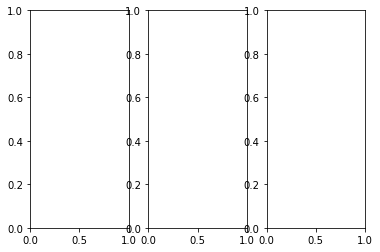

In [ ]:
idx_WT = [4, 5, 6, 7]
idx_AP = [0, 1, 2, 3]
idx_cTKO = [8, 9, 10, 11, 12]

fig, ax = plt.subplots(1, 3)
ax[0].errorbar(
    np.ones_like(idx_WT) + np.random.rand(4),
    gamma[idx_WT, 0],
    yerr=(gamma[idx_WT, 1:] - gamma[idx_WT, 0:1]).T,
    color="k",
    ls="none",
)
ax[0].plot(np.ones_like(idx_AP) * 2, gamma[idx_AP, 0], "go")
ax[0].plot(np.ones_like(idx_cTKO) * 3, gamma[idx_cTKO, 0], "ro")

ax[1].plot(np.ones_like(idx_WT), delta[idx_WT, 0], "ko")
ax[1].plot(np.ones_like(idx_AP) * 2, delta[idx_AP, 0], "go")
ax[1].plot(np.ones_like(idx_cTKO) * 3, delta[idx_cTKO, 0], "ro")

ax[2].plot(np.ones_like(idx_WT), nu_max[idx_WT, 0], "ko")
ax[2].plot(np.ones_like(idx_AP) * 2, nu_max[idx_AP, 0], "go")
ax[2].plot(np.ones_like(idx_cTKO) * 3, nu_max[idx_cTKO, 0], "ro")
plt.show()

In [ ]:
tP = transformParas(1.2, 4.2, 22.0)

In [ ]:
tP.updateParas({"tau_A": 0.001, "gamma": 1.26, "delta": 4.5, "nu_max": 45 / 60})
tP.get_r_NMDA()

nan

In [136]:
I.data_df

*mouse_type          LM (APLP1 KO)                          \
animal      20180325 (app ko7 739) 20180325A (app ko8 740)   
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
..                             ...                     ...   
365                            NaN                     NaN   
366                            NaN                     NaN   
367                            NaN                     NaN   
368                            NaN                     NaN   
369                            NaN                     NaN   

*mouse_type                                                         WT  \
animal      20180402A (app ko13 734) 20180419 (app ko14 756) 20180310A   
0                                0.0                     0.0       0.0   
1                                0.0                     0.0       0.0   
2                                0.0                     0.0       0.0   
3                                0.0                     0.0       0.0   
4                                0.0                     0.0       0.0   
..                               ...                     ...       ...   
365                              NaN                     NaN       NaN   
366                              NaN                     NaN       NaN   
367                              NaN                     NaN       NaN   
368                              NaN                     NaN       NaN   
369                              NaN                     NaN       NaN   

*mouse_type                                  cTKO                              \
animal      20180310B 20180312A 20180401 20180309 20180310  20180311 20180329   
0                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
1                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
2                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
3                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
4                 0.0       0.0      0.0      0.0      0.0  0.000000      0.0   
..                ...       ...      ...      ...      ...       ...      ...   
365               NaN       NaN      NaN      NaN      NaN  6.153846      NaN   
366               NaN       NaN      NaN      NaN      NaN  6.153846      NaN   
367               NaN       NaN      NaN      NaN      NaN  6.923077      NaN   
368               NaN       NaN      NaN      NaN      NaN  7.307692      NaN   
369               NaN       NaN      NaN      NaN      NaN  8.076923      NaN   

*mouse_type            
animal      20180329A  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
..                ...  
365               NaN  
366               NaN  
367               NaN  
368               NaN  
369               NaN  

[370 rows x 13 columns]

/tmp/ipykernel_199670/3224483873.py:4: RuntimeWarning: divide by zero encountered in log
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \
/tmp/ipykernel_199670/3224483873.py:6: RuntimeWarning: divide by zero encountered in log
  np.cosh( gamma * delta * np.sqrt( -2 * np.log( nu / nu_max) ) )
/tmp/ipykernel_199670/3224483873.py:4: RuntimeWarning: invalid value encountered in multiply
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \


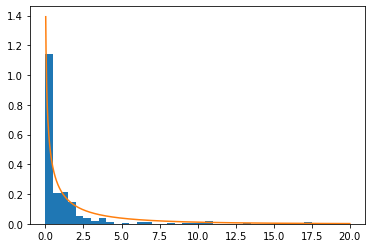

In [ ]:
plt.hist(I.data[:, 1], np.linspace(0, 20, 41), density=True)
nu_arr = np.linspace(0, 20, 1001)
plt.plot(nu_arr, p_nu(nu_arr, 1.46, 3.71, 27.92))
plt.show()

In [ ]:
trafo = I.setPriorTransform()
trafo(np.random.rand(10, 3))

array([[  0.75607408,   3.42825043,  72.0484767 ],
       [  1.73287295,   3.60684533, 104.53933117],
       [  1.80884329,   4.27850686,  15.69271612],
       [  0.91990877,   3.55685496,  52.46742652],
       [  2.10199671,   3.56393846,  60.70995248],
       [  2.69340341,   4.02459878,  12.8520792 ],
       [  1.67867565,   4.63330321,  21.90654453],
       [  1.30245563,   3.7190702 ,  67.15884946],
       [  1.6540832 ,   3.59150864,  49.10787112],
       [  1.06636871,   4.23933503,  49.73194162]])

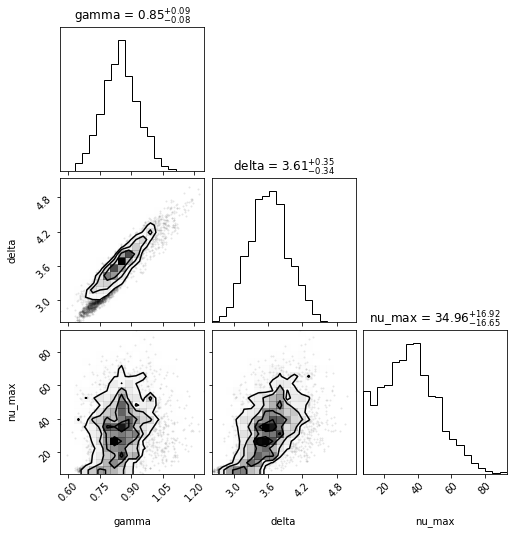

In [ ]:
from ultranest.plot import cornerplot

cornerplot(result)

In [49]:
plt.figure()
sampler.plot_run()
sampler.plot_trace()
sampler.plot_corner()
plt.show()

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


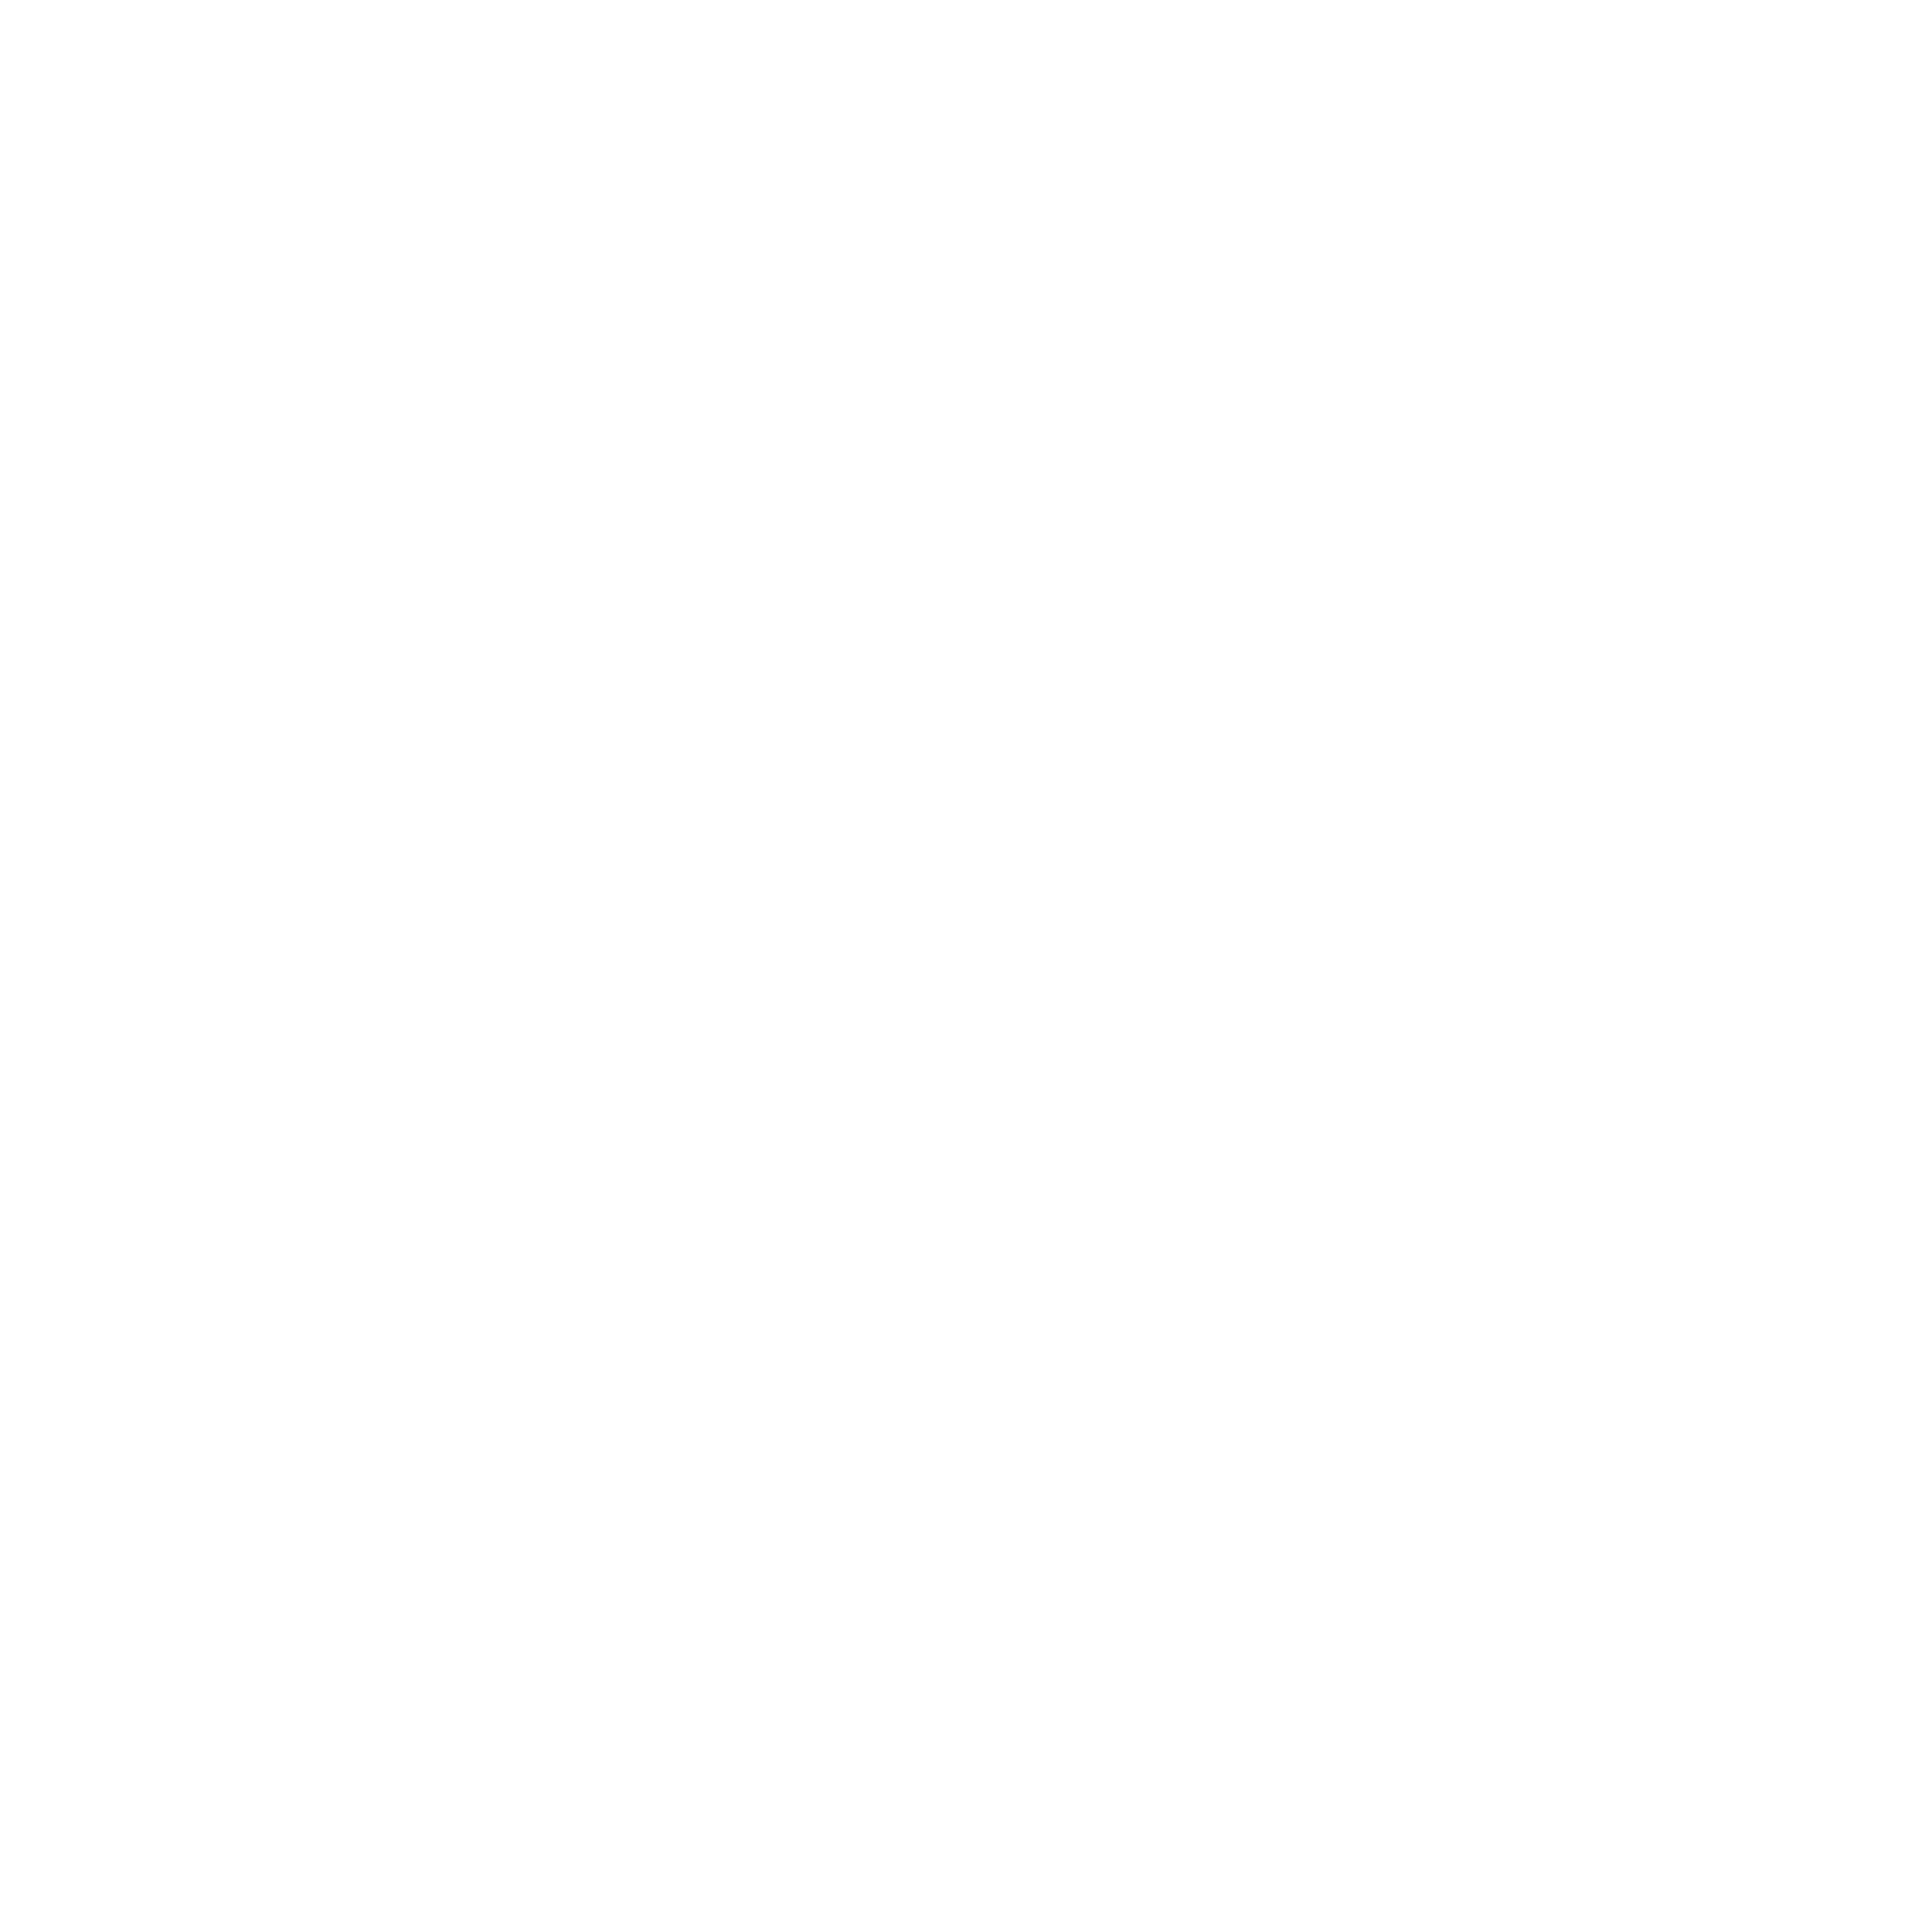

In [51]:
%matplotlib nbagg
sampler.

In [10]:
sampler.print_results()


logZ = -118582.967 +- 0.459
  single instance: logZ = -118582.967 +- 0.272
  bootstrapped   : logZ = -118582.958 +- 0.459
  tail           : logZ = +- 0.010
insert order U test : converged: False correlation: 1110 iterations

    gamma               : 1.2707│ ▁▁▁▁▁▁▁▁▁▁▂▂▃▃▅▆▆▇▆▇▇▅▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁ │1.3318    1.3015 +- 0.0068
    delta               : 1.416 │▁▁▁▁▁▁▁▁▁▁▂▃▄▄▅▆▆▇▇▆▆▅▅▃▃▂▁▁▁▁▁▁▁▁   ▁ │1.525     1.467 +- 0.012
    nu_max              : 18.158│ ▁   ▁▁▁▁▁▁▁▂▂▃▄▅▄▆▇▇▇▆▅▅▄▂▂▂▁▁▁▁▁▁▁ ▁ │18.871    18.534 +- 0.076



In [20]:
result.keys()

dict_keys(['niter', 'logz', 'logzerr', 'logz_bs', 'logz_single', 'logzerr_tail', 'logzerr_bs', 'ess', 'H', 'Herr', 'posterior', 'weighted_samples', 'samples', 'maximum_likelihood', 'ncall', 'paramnames', 'logzerr_single', 'insertion_order_MWW_test'])

In [ ]:
gamma = 1.5  # np.array([1.5,1.7])
delta = 4.2  # np.array([4.2,4.5])
nu_max = 40.0  # np.array([40.,50.])

N_AP = np.array([10, 20, 0, 3])[:, np.newaxis, np.newaxis]
T_total = 10.0


def f(nu):  # ,gamma,delta,nu_max,N_AP,T_total):
    # print(p_nu(nu,gamma,delta,nu_max))
    # print(p_nu(nu,gamma,delta,nu_max)[np.newaxis,...].shape)
    # print(poisson_spikes(nu,N_AP,T_total).shape)
    return p_nu(nu, gamma, delta, nu_max)[np.newaxis, ...] * poisson_spikes(
        nu, N_AP, T_total
    )


eps_pow = -8
# p_N_AP_arr, err = quadpy.quad(f,[0],[nu_max[0]],
p_N_AP_arr, err = quadpy.c1.integrate_adaptive(
    f,
    [[0, 0.2], [nu_max, nu_max]],
    domain_shape=(2,),  # range_shape=(2,),
    # args=(gamma,delta,nu_max,N_AP,T_total),
    eps_abs=10**eps_pow,
    eps_rel=10**eps_pow,
)
#    limit=100)
p_N_AP_arr

array([[0.03030462, 0.03045599],
       [0.01492237, 0.01499735],
       [0.19635129, 0.01126758],
       [0.07444188, 0.05675328]])

poisson: [ 0.     0.041  0.082 ... 40.918 40.959 41.   ] 10


/tmp/ipykernel_70991/580719938.py:2: RuntimeWarning: divide by zero encountered in log
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \
/tmp/ipykernel_70991/580719938.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \
/tmp/ipykernel_70991/580719938.py:4: RuntimeWarning: divide by zero encountered in log
  np.cosh( gamma * delta * np.sqrt( -2 * np.log( nu / nu_max) ) )
/tmp/ipykernel_70991/580719938.py:2: RuntimeWarning: invalid value encountered in multiply
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( nu / nu_max ) ) ) * \
/tmp/ipykernel_70991/580719938.py:8: RuntimeWarning: divide by zero encountered in log
  return np.exp(N*np.log(nu*T_total) - np.log(sp_factorial(N)) - nu*T_total)


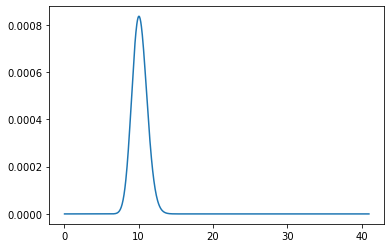

In [ ]:
nu_arr = np.linspace(0, 41, 1001)
plt.plot(nu_arr, p_nu(nu_arr, 1.63, 1.63, 41.0) * poisson_spikes(nu_arr, 100, 10))
plt.show()

In [ ]:
n = 300
N_AP_max = 200
N_AP = np.arange(0, N_AP_max)[:, np.newaxis]
k_AP = np.array(np.random.randint(0, 100, N_AP_max))
T_total = 10

eps_pow = -6


def my_likelihood(params):

    gamma, delta, nu_max = params
    ## define likelihood based on parameters, with data provided from context
    # integrate rho_nu with poisson

    def f(nu, gamma, delta, nu_max, N_AP, T_total):
        return p_nu(nu, gamma, delta, nu_max)[np.newaxis, :] * poisson_spikes(
            nu, N_AP, T_total
        )

    fail = True
    eps_pow = -8
    while True:
        if eps_pow == -1:
            print("tolerance too high - breaking!")
            output = np.ones_like(inputs[0]) * (-100)
            break
        try:
            p_N_AP_arr, err = quadpy.quad(
                f,
                [0],
                [nu_max],
                args=(gamma, delta, nu_max, N_AP, T_total),
                epsabs=10**eps_pow,
                epsrel=10**eps_pow,
                limit=100,
            )
            break
        except:
            eps_pow += 1

    # print(p_N_AP_arr)
    # calculate chance to appear k times
    p_k = sp_binom(n, k_AP) * p_N_AP_arr**k_AP * (1 - p_N_AP_arr) ** (n - k_AP)
    # p_k[p_k==0] = 10**(-300)
    return np.log(p_k[p_k > 0])